**Statistical analysis and Regression models building for [dataset](https://archive.ics.uci.edu/ml/datasets/auto+mpg)**

# Open data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import scipy.stats as stats

In [2]:
# preparation of csv format
import re
with open("./auto-mpg.data") as f:
  content = f.read()
  content = re.sub('\s\s+', ';', content)
  content = re.sub('\t', ';', content)
  content = content.replace('"', '')

In [3]:
# creating dataframe
df = pd.DataFrame([x.split(';') for x in content.split('\n')],
                  columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
394,44.0,4,97.00,52.00,2130.,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.,19.4,82,1,chevy s-10


In [4]:
# mark missing values as NaN and delete it
df.replace('', np.nan, inplace=True)
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.,15.6,82,1,ford mustang gl
394,44.0,4,97.00,52.00,2130.,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.,18.6,82,1,ford ranger


Let's firstly set corret data types for variables:
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [5]:
# we need to work with numeric values, but now they have object type
df.dtypes

mpg             object
cylinders       object
displacement    object
horsepower      object
weight          object
acceleration    object
model_year      object
origin          object
car_name        object
dtype: object

In [6]:
# convert to numeric values, we will not use 'car name' in prediction
df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']] = df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']].apply(pd.to_numeric)

In [7]:
# we will not use 'car name' for predicion as far as it is unique value
df = df.drop('car_name', axis = 1)
df.dtypes

mpg             float64
cylinders        object
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year       object
origin           object
dtype: object

Finally we have 8 variables, 5 of them are numeric and 3 of them are categorical

# Statistical analysis: visualization and outliers cleaning

In [8]:
# numeric statistics
df.describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


Visualisation of data and clean outliers

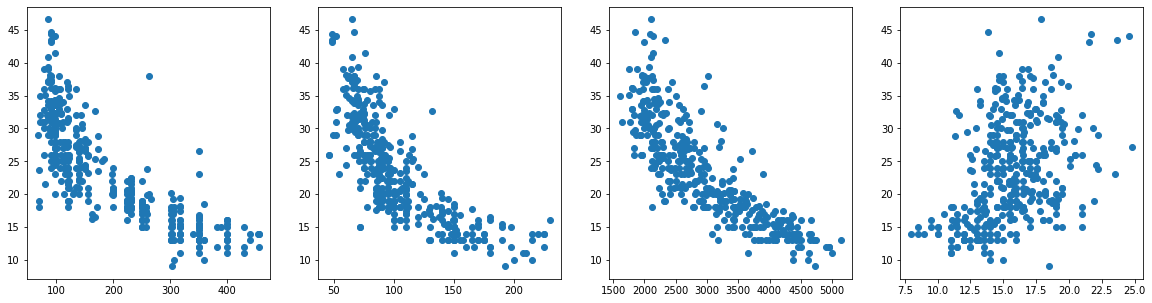

In [9]:
plt.figure(figsize=(20, 5))
plt.subplot(141)
plt.scatter(df['displacement'],df['mpg'])
plt.subplot(142)
plt.scatter(df['horsepower'],df['mpg'])
plt.subplot(143)
plt.scatter(df['weight'],df['mpg'])
plt.subplot(144)
plt.scatter(df['acceleration'],df['mpg'])
plt.show()

We can easily notice some trends on plots (but not so clear for last one)

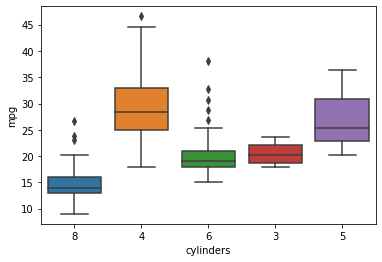

In [10]:
sns.boxplot(x='cylinders', y='mpg', data=df)

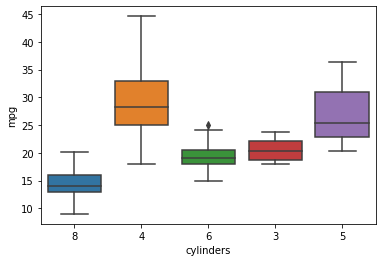

In [11]:
# clean outliers 
df = df.drop(df[(df.mpg > 25) & (df.cylinders == '6')].index)
df = df.drop(df[(df.mpg > 22) & (df.cylinders == '8')].index)
df = df.drop(df[(df.mpg > 46) & (df.cylinders == '4')].index)
sns.boxplot(x='cylinders', y='mpg', data=df)

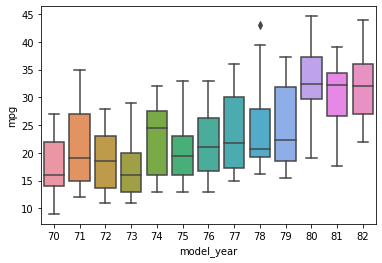

In [12]:
sns.boxplot(x='model_year', y='mpg', data=df)

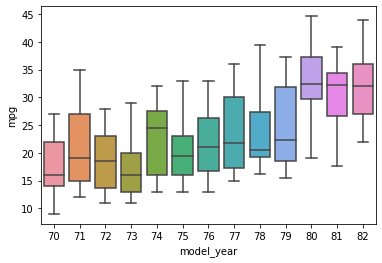

In [13]:
df = df.drop(df[(df.mpg > 40) & (df.model_year == '78')].index)
sns.boxplot(x='model_year', y='mpg', data=df)

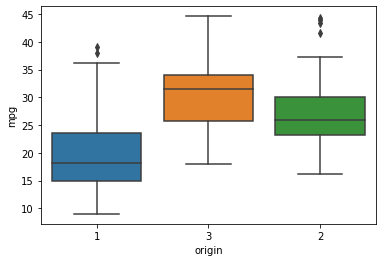

In [14]:
sns.boxplot(x='origin', y='mpg', data=df)

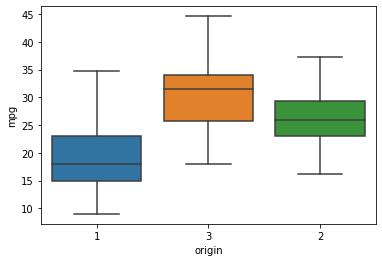

In [15]:
df = df.drop(df[(df.mpg > 40) & (df.origin == '2')].index)
df = df.drop(df[(df.mpg > 35) & (df.origin == '1')].index)
sns.boxplot(x='origin', y='mpg', data=df)

# Statistical analysis: overall description and outcome analysis

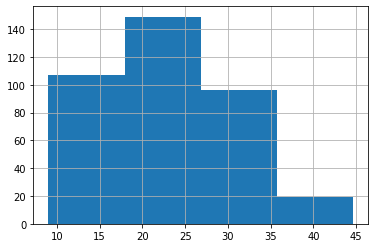

In [16]:
df['mpg'].hist(bins=4)

In [17]:
# check normal distribution for 'mpg'
stats.shapiro(df['mpg'])

ShapiroResult(statistic=0.9672062993049622, pvalue=2.121889792761067e-07)

P-value is less than 0.05, hence MPG does not satisfy noraml distribution

In [18]:
df.describe()

,mpg,displacement,horsepower,weight,acceleration
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,22.779515,196.737197,105.738544,3002.396226,15.456873
std,7.290672,105.307049,38.696031,854.373443,2.652042
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,106.000000,77.500000,2245.500000,13.750000
50%,22.000000,151.000000,95.000000,2833.000000,15.500000
75%,28.000000,302.000000,130.000000,3638.500000,17.000000
max,44.600000,455.000000,230.000000,5140.000000,24.800000


# Statistical analysis: influence of quantitative features

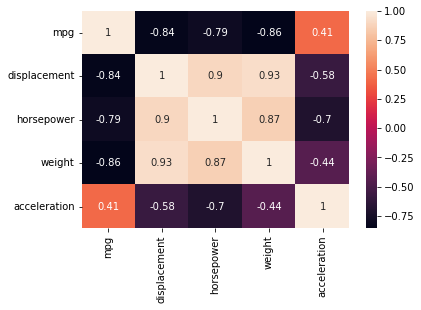

In [19]:
num = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
hm = sns.heatmap(df[num].corr(),annot=True)

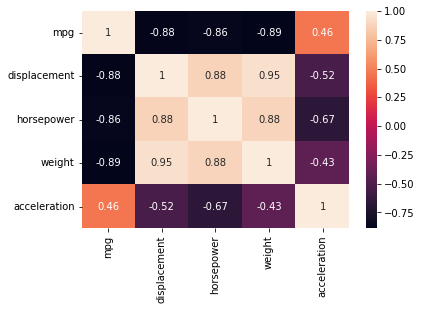

In [20]:
ran = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
hm = sns.heatmap(df[ran].corr(method = 'spearman'), annot=True)

We can see strong negative correlations, but features also correlate with each, it can lead to additional noise for our final model.

In [21]:
for col in ran:
  print(f'{scipy.stats.pearsonr(df.mpg, df[col])} \t: {col}')

(1.0, 0.0) 	: mpg
(-0.8350858724552517, 8.405715979370702e-98) 	: displacement
(-0.7890045139040969, 4.524338045851071e-80) 	: horsepower
(-0.8556931829234443, 1.2977758513626963e-107) 	: weight
(0.4135207626523738, 9.321816059596613e-17) 	: acceleration


All p-values are much less than 0.05, hence we confirm hypothesis that correlation exists.

# Statistical analysis: influence of categorical features

In [22]:
df.groupby('cylinders')[['mpg']].mean()

,mpg
cylinders,
3,20.550000
4,28.576471
5,27.366667
6,19.161039
8,14.677000


In [23]:
df.groupby('model_year')[['mpg']].mean()

,mpg
model_year,
70,17.689655
71,21.111111
72,18.714286
73,17.100000
74,22.769231
75,20.266667
76,21.573529
77,23.375000
78,23.147059


In [24]:
df.groupby('origin')[['mpg']].mean()

,mpg
origin,
1,19.400429
2,26.290323
3,30.275000


We can check hypothesis about mean equality, but here it's quite obvious inequality

In [25]:
fl_0 = np.array(df[df['origin']=='1']['mpg'])
fl_1 = np.array(df[df['origin']=='2']['mpg'])
fl_2 = np.array(df[df['origin']=='3']['mpg'])
stats.mstats.kruskalwallis(fl_0, fl_1, fl_2)

KruskalResult(statistic=140.21834562581196, pvalue=3.5642906927666405e-31)

P-value is less then 0.05, hence we do not accept hypothesis

# Regression analysis

Let's start with ols method and R-lang notation

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
resultsm = smf.ols('mpg ~ displacement + horsepower + weight + acceleration + C(cylinders) + C(model_year) + C(origin)', data=df).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     140.0
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          4.38e-158
Time:                        21:09:29   Log-Likelihood:                -838.58
No. Observations:                 371   AIC:                             1723.
Df Residuals:                     348   BIC:                             1813.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              31.0410      2.029     15.295      0.000      27.049      35.032
C(cylinders)[T.4]       7.9589      1.314      6.057      0.000       5.374      10.543
C(cylinders)[T.5]       8.9353      1.999      4.470      0.000       5.004      12.867
C(cylinders)[T.6]       4.4944      1.482      3.033      0.003       1.580       7.409
C(cylinders)[T.8]       5.7826      1.693      3.416      0.001       2.453       9.112
C(model_year)[T.71]     0.7036      0.688      1.023      0.307      -0.649       2.056
C(model_year)[T.72]    -0.7553      0.678     -1.113      0.266      -2.089       0.579
C(model_year)[T.73]    -0.6888      0.608     -1.133      0.258      -1.884       0.507
C(model_year)[T.74]     1.0204      0.721      1.415      0.158      -0.397       2.438
C(model_year)[T.75]     0.6365      0.707      0.901      0.368      -0.753       2.026
C(model_year)[T.76]     1.3753      0.676      2.033      0.043       0.045       2.706
C(model_year)[T.77]     2.7129      0.691      3.924      0.000       1.353       4.073
C(model_year)[T.78]     2.1439      0.665      3.226      0.001       0.837       3.451
C(model_year)[T.79]     4.1159      0.733      5.617      0.000       2.675       5.557
C(model_year)[T.80]     6.9611      0.780      8.923      0.000       5.427       8.495
C(model_year)[T.81]     5.4417      0.759      7.171      0.000       3.949       6.934
C(model_year)[T.82]     5.9974      0.749      8.006      0.000       4.524       7.471
C(origin)[T.2]          0.7293      0.464      1.571      0.117      -0.184       1.643
C(origin)[T.3]          2.6257      0.434      6.051      0.000       1.772       3.479
displacement            0.0053      0.006      0.869      0.386      -0.007       0.017
horsepower             -0.0405      0.011     -3.586      0.000      -0.063      -0.018
weight                 -0.0039      0.001     -7.181      0.000      -0.005      -0.003
acceleration           -0.1653      0.080     -2.059      0.040      -0.323      -0.007
==============================================================================
Omnibus:                        7.869   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.020   Jarque-Bera (JB):               10.145
Skew:                           0.189   Prob(JB):                      0.00627
Kurtosis:                       3.717   Cond. No.                     7.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's rebuild a model without features with P-val > 0.05

In [28]:
df_new = df.drop(df[(df.model_year == '71') | (df.model_year == '72') | (df.model_year == '73') | (df.model_year == '74') | (df.model_year == '75') | (df.origin == '2')].index)

In [29]:
resultsm = smf.ols('mpg ~ horsepower + weight + acceleration + C(cylinders) + C(model_year) + C(origin)', data=df_new).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     116.0
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           1.85e-79
Time:                        21:09:29   Log-Likelihood:                -421.97
No. Observations:                 186   AIC:                             873.9
Df Residuals:                     171   BIC:                             922.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              34.5517      2.934     11.775      0.000      28.760      40.344
C(cylinders)[T.4]       8.1806      1.839      4.448      0.000       4.550      11.811
C(cylinders)[T.6]       5.2846      1.918      2.755      0.007       1.498       9.071
C(cylinders)[T.8]       6.4000      2.001      3.199      0.002       2.450      10.350
C(model_year)[T.76]     1.5372      0.851      1.807      0.073      -0.142       3.217
C(model_year)[T.77]     2.5019      0.843      2.969      0.003       0.839       4.165
C(model_year)[T.78]     2.1128      0.806      2.621      0.010       0.522       3.704
C(model_year)[T.79]     3.5890      0.881      4.074      0.000       1.850       5.328
C(model_year)[T.80]     5.9059      0.993      5.946      0.000       3.945       7.867
C(model_year)[T.81]     4.5460      0.908      5.007      0.000       2.754       6.338
C(model_year)[T.82]     5.0974      0.897      5.680      0.000       3.326       6.869
C(origin)[T.3]          2.2238      0.536      4.150      0.000       1.166       3.282
horsepower             -0.0277      0.015     -1.825      0.070      -0.058       0.002
weight                 -0.0051      0.001     -6.119      0.000      -0.007      -0.003
acceleration           -0.1864      0.111     -1.673      0.096      -0.406       0.034
==============================================================================
Omnibus:                        6.282   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                7.360
Skew:                           0.257   Prob(JB):                       0.0252
Kurtosis:                       3.828   Cond. No.                     6.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# update our model once again
df_new = df_new.drop(df_new[df_new.model_year == '76'].index)

In [31]:
# parameters correlate a lot with each other, so finally we use only those which have a large effect
resultsm = smf.ols('mpg ~ weight + C(cylinders) + C(model_year) + C(origin)', data=df_new).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     132.6
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           8.74e-71
Time:                        21:09:29   Log-Likelihood:                -361.97
No. Observations:                 160   AIC:                             747.9
Df Residuals:                     148   BIC:                             784.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              32.8904      2.593     12.684      0.000      27.766      38.015
C(cylinders)[T.4]       7.9295      1.786      4.440      0.000       4.400      11.459
C(cylinders)[T.6]       5.1578      1.876      2.749      0.007       1.451       8.865
C(cylinders)[T.8]       7.1999      2.004      3.593      0.000       3.240      11.160
C(model_year)[T.77]     3.0646      0.748      4.098      0.000       1.587       4.542
C(model_year)[T.78]     2.6617      0.733      3.633      0.000       1.214       4.110
C(model_year)[T.79]     4.2140      0.764      5.519      0.000       2.705       5.723
C(model_year)[T.80]     6.4361      0.913      7.046      0.000       4.631       8.241
C(model_year)[T.81]     5.1302      0.838      6.126      0.000       3.475       6.785
C(model_year)[T.82]     5.5474      0.846      6.560      0.000       3.876       7.219
C(origin)[T.3]          2.0147      0.560      3.599      0.000       0.909       3.121
weight                 -0.0066      0.001    -10.468      0.000      -0.008      -0.005
==============================================================================
Omnibus:                        6.013   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                8.328
Skew:                           0.169   Prob(JB):                       0.0155
Kurtosis:                       4.065   Cond. No.                     5.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Finally, we have a model with R-squared = 0.908. Kurtosis is close to 3, skew is close to zero and we can accept the hypothesis about normality because of Jarque-Bera test result (p-value is less than 0.0155), hence we built a good model.

Now let's use other models from sklearn

In [32]:
df_wide = pd.concat((df,pd.get_dummies(df.cylinders, prefix="cyl_", prefix_sep='',)),1)
df_wide = pd.concat((df_wide,pd.get_dummies(df_wide.model_year, prefix="my_", prefix_sep='',)),1)
df_wide = pd.concat((df_wide,pd.get_dummies(df_wide.origin, prefix="or_", prefix_sep='',)),1)
df_wide

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8,my_70,my_71,my_72,my_73,my_74,my_75,my_76,my_77,my_78,my_79,my_80,my_81,my_82,or_1,or_2,or_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950.0,17.3,82,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [34]:
X = df_wide.drop(['mpg'],axis=1)
Y = df_wide[['mpg']]
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, Y, test_size=0.3)

In [35]:
import sklearn.linear_model as lm
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
import math

Linear Regression, Decision tree, Random Forest, Gradient boostig methods applying

In [36]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

models = [lm.LinearRegression(), tree.DecisionTreeRegressor(), 
          RandomForestRegressor(n_estimators=100, max_features ='auto'), GradientBoostingRegressor(**params)]

mse_tr = []
mse_te = []
rmse_tr = []
rmse_te = []
r2_tr = []
r2_te = []

for model in models:
  model.fit(Xtrn,Ytrn)
  Ytrn_pred = model.predict(Xtrn)
  Ytest_pred = model.predict(Xtest)
  
  mse_tr.append(mean_squared_error(Ytrn, Ytrn_pred))
  mse_te.append(mean_squared_error(Ytest, Ytest_pred))
  rmse_tr.append(math.sqrt(mse_tr[-1]))
  rmse_te.append(math.sqrt(mse_te[-1]))
  r2_tr.append(r2_score(Ytrn, Ytrn_pred))
  r2_te.append(r2_score(Ytest, Ytest_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Methods comparasion

## Метрики качества
Сoefficient of determination
$$ R^2=1-\frac{\sum{(y_i-\hat y_i)^2}}{\sum{(y_i-\bar y)^2}}=\frac{\sum{(\hat y_i-\bar y)^2}}{\sum{(y_i-\bar y)^2}} $$

Mean Squared Error
$$ MSE=\frac{1}{n}\sum{(y_i-\hat y_i)^2}$$

Root Mean Squared Error
$$ RMSE=\sqrt{\frac{1}{n}\sum{(y_i-\hat y_i)^2}}$$

In [37]:
results = pd.DataFrame(np.array([mse_tr, mse_te, rmse_tr, rmse_te, r2_tr, r2_te]),
                   columns=['Linear Regression','Decision Tree','Random Forest','Gradient Boosting'],
                   index=['mse_train', 'mse_test', 'rmse_train', 'rmse_test', 'r2_train', 'r2_test'])
results

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting
mse_train,5.842323,0.000000,0.686250,1.052166
mse_test,5.235307,10.508661,5.578430,6.162238
rmse_train,2.417090,0.000000,0.828402,1.025751
rmse_test,2.288079,3.241706,2.361870,2.482385
r2_train,0.885503,1.000000,0.986551,0.979380
r2_test,0.908857,0.817052,0.902884,0.892720


As we can see Random Forest shows the best result, but we can also conclude that algorithms are overfitted and require parameteres tuning.
